<a href="https://colab.research.google.com/github/esrayuzgec/AlzheimerDetection/blob/main/Alzheimer_xresnet101_withmetrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [2]:
from fastai.vision.all import *
from fastbook import *

In [3]:
path = Path("/content/gdrive/MyDrive/Training")

In [4]:
path.ls()

(#2) [Path('/content/gdrive/MyDrive/Training/AD'),Path('/content/gdrive/MyDrive/Training/CN')]

In [5]:
train_fnames = get_image_files(path)

In [6]:
item_tfms = Resize(256)
batch_tfms = aug_transforms=[Normalize.from_stats(*imagenet_stats)]

In [7]:
braindb = DataBlock(blocks=(ImageBlock,CategoryBlock),
                  get_items= get_image_files,
                  get_y = parent_label,
                  splitter =RandomSplitter(valid_pct= 0.3, seed = 42),
                  item_tfms = item_tfms,
                  batch_tfms = batch_tfms
                  )
dls = braindb.dataloaders(path,bs=16)

In [8]:
learn = cnn_learner(dls, xresnet101, metrics=[accuracy,error_rate])

SuggestedLRs(lr_min=0.0002511886414140463, lr_steep=7.585775847473997e-07)

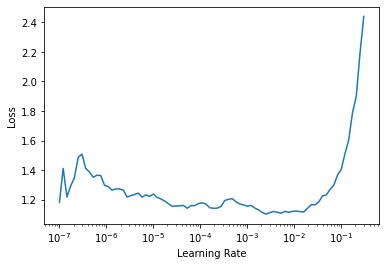

In [9]:
learn.lr_find()

In [10]:
learn.fine_tune(50,1.2e-3)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.330687,0.834468,0.541667,0.458333,00:59


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.923219,0.761333,0.591667,0.408333,00:38
1,0.760041,0.768627,0.583333,0.416667,00:39
2,0.662237,0.792662,0.591667,0.408333,00:38
3,0.596018,0.692902,0.691667,0.308333,00:38
4,0.549445,0.681208,0.708333,0.291667,00:38
5,0.493097,0.710702,0.700000,0.300000,00:39
6,0.473730,0.822084,0.633333,0.366667,00:39
7,0.484277,0.912689,0.625000,0.375000,00:39
8,0.452923,1.602196,0.525000,0.475000,00:39
9,0.445214,0.913811,0.691667,0.308333,00:39


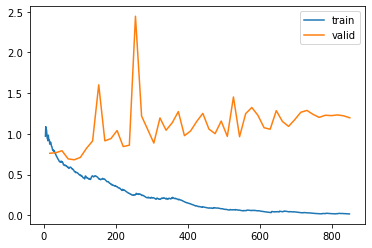

In [12]:
learn.recorder.plot_loss()

In [13]:
learn.unfreeze()

SuggestedLRs(lr_min=0.0007585775572806596, lr_steep=6.309573450380412e-07)

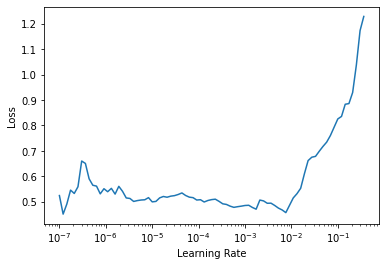

In [17]:
learn.lr_find()

In [18]:
learn.fit_one_cycle(25,0.5e-3)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.541781,0.810283,0.608333,0.391667,00:40
1,0.458810,0.666324,0.641667,0.358333,00:40
2,0.414801,0.577413,0.725000,0.275000,00:40
3,0.398094,0.741359,0.633333,0.366667,00:40
4,0.362349,0.760194,0.700000,0.300000,00:40
5,0.347429,1.994740,0.500000,0.500000,00:39
6,0.335365,1.818834,0.516667,0.483333,00:40
7,0.315629,1.486894,0.591667,0.408333,00:39
8,0.288216,1.588611,0.550000,0.450000,00:40
9,0.257160,1.195749,0.591667,0.408333,00:39


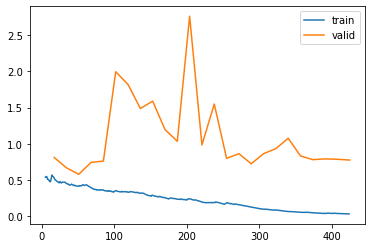

In [19]:
learn.recorder.plot_loss()

In [21]:
interp= ClassificationInterpretation.from_learner(learn)

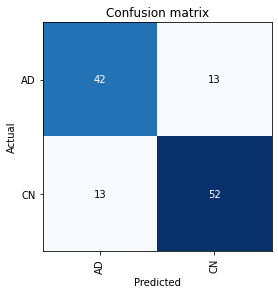

In [24]:
interp.plot_confusion_matrix()

In [25]:
interp.print_classification_report()

              precision    recall  f1-score   support

          AD       0.76      0.76      0.76        55
          CN       0.80      0.80      0.80        65

    accuracy                           0.78       120
   macro avg       0.78      0.78      0.78       120
weighted avg       0.78      0.78      0.78       120

